## Importing Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio as rio
from mpl_toolkits import mplot3d
import numpy as np
import earthpy.plot as ep
import earthpy as et
import geopy
from geopy.geocoders import Nominatim
import geoplot
from geopandas.tools import geocode
from matplotlib import collections, colors, transforms
from PIL import Image
from rasterio.windows import Window
from rasterio.windows import from_bounds

## Address Coodinates

### Using Geocode Library

In [82]:
#address we need to locate
address = "Essen Station"
 
#finding the location
location = geocode(address, provider="nominatim" , user_agent = 'my_request')
 
point = location.geometry.iloc[0]
print('Name: '+ address )
print('complete address: '+ location.address.iloc[0])
print('longitude: {} '.format(point.x))
print('latitude: {} '.format(point.y))

location.dtypes


Name: Essen Station
complete address: Essen Station, Handelsstraat, Schildershof, Heikant, Essen, Antwerpen, Vlaanderen, 2910, België / Belgique / Belgien
longitude: 4.451288 
latitude: 51.463451 


geometry    geometry
address       object
dtype: object

In [59]:
# head of dataframe
location.head()

geometry                                            address
0  POINT (4.45129 51.46345)  Essen Station, Handelsstraat, Schildershof, He...

In [60]:
# converting coordinates from GPS to Lumbert
location = location.to_crs("EPSG:31370")

In [61]:
# geodataframe of location
location

geometry  \
0  POINT (155735.738 239317.845)   

                                             address  
0  Essen Station, Handelsstraat, Schildershof, He...

In [62]:
location.geometry

0    POINT (155735.738 239317.845)
Name: geometry, dtype: geometry

In [63]:
location.bounds

minx           miny           maxx           maxy
0  155735.737963  239317.844992  155735.737963  239317.844992

In [64]:
location.transform

<bound method DataFrame.transform of                         geometry  \
0  POINT (155735.738 239317.845)   

                                             address  
0  Essen Station, Handelsstraat, Schildershof, He...  >

In [65]:
# dataframe address in leaflet map
img = location.explore("address", cmap = "Reds")
img

<AxesSubplot:>

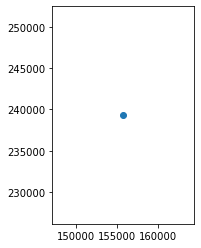

In [66]:
# dataframe address graph
location.plot()  

## LIDAR Data

### Working with Shapefiles using GeoPandas

In [37]:
#Reading shapefile using geopandas

geo_dsm = gpd.read_file("C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01 -1/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

geo_dtm = gpd.read_file("C:/Users/HP/Downloads/DHMVIIDTMRAS1m_k01-1/DHMVII_vdc_k01/DHMVII_vdc_k01.shp")

In [38]:
# geo_dsm dataframe
geo_dsm

Id   OpnDatum1   OpnDatum2  \
0   0  2013-02-20        None   
1   0  2013-04-01        None   
2   0  2013-02-20  2013-04-01   

                                            geometry  
0  MULTIPOLYGON Z (((162079.010 238604.770 0.000,...  
1  POLYGON Z ((148803.300 243432.780 0.000, 14882...  
2  MULTIPOLYGON Z (((156554.470 243736.800 0.000,...

In [39]:
# geo_dtm dataframe
geo_dtm

Id   OpnDatum1   OpnDatum2  \
0   0  2013-02-20        None   
1   0  2013-04-01        None   
2   0  2013-02-20  2013-04-01   

                                            geometry  
0  MULTIPOLYGON Z (((162079.010 238604.770 0.000,...  
1  POLYGON Z ((148803.300 243432.780 0.000, 14882...  
2  MULTIPOLYGON Z (((156554.470 243736.800 0.000,...

In [40]:
# Bounds of geo_dsm file
geo_dsm.bounds

minx       miny           maxx           maxy
0  144900.0  237758.67  162100.030020  247224.389995
1  144900.0  238850.25  162100.000132  243457.759998
2  144900.0  238493.37  162100.000116  243768.959990

In [41]:
# bounds of geo_dsm file
geo_dtm.bounds

minx       miny           maxx           maxy
0  144900.0  237758.67  162100.030020  247224.389995
1  144900.0  238850.25  162100.000132  243457.759998
2  144900.0  238493.37  162100.000116  243768.959990

<AxesSubplot:>

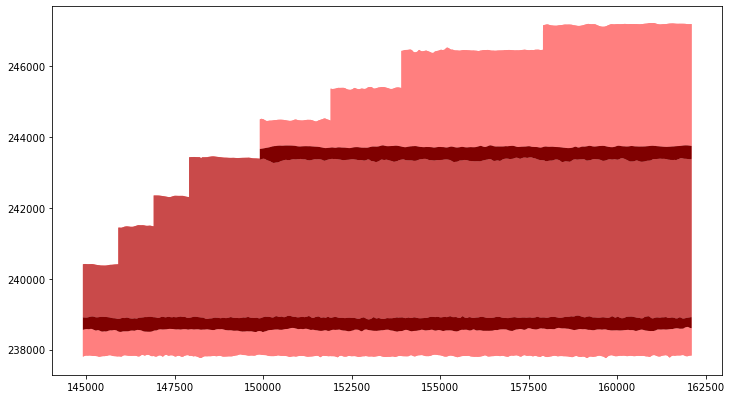

In [42]:
# create the plot of shapefile
fig, ax = plt.subplots(figsize=(12, 8))


geo_dtm.plot(ax=ax, markersize=10, color='r')

# add the reprojected SJER boundary to the plot
geo_dsm.plot(cmap='Greys', ax=ax, alpha=.5)

In [43]:
#fig, ax = plt.subplots(figsize=(10, 5))
geo_dsm.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)")

[Text(0.5, 3.200000000000017, 'Longitude (Degrees)'),
 Text(3.200000000000003, 0.5, 'Latitude (Degrees)')]

<Figure size 432x288 with 0 Axes>

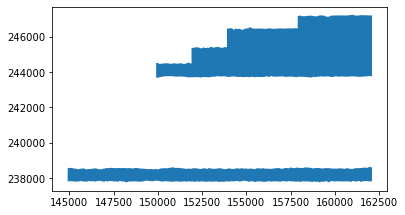

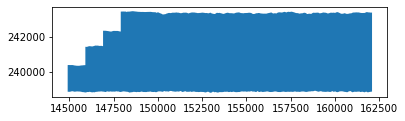

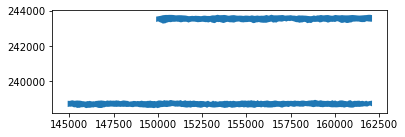

In [44]:
#plotting each polygon in shapefile
for row in geo_dsm.iterrows():    
    geom = gpd.GeoSeries(row[1].geometry)
    geom.plot()

In [34]:
geo_dsm.explore()

In [35]:
geo_dtm.explore()

### Working with Geotiff using Rasterio

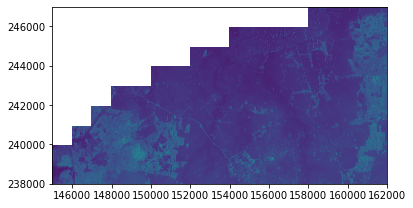

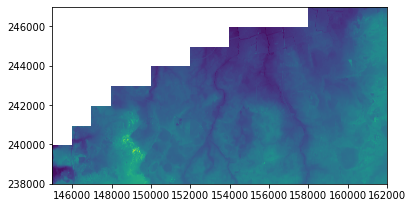

<AxesSubplot:>

In [15]:
# Extracting data from dsm (geotiff files)
dsm_path = r"C:/Users/HP/Downloads/DHMVIIDSMRAS1m_k01 -1/GeoTIFF/DHMVIIDSMRAS1m_k01.tif"
dsm_file = rio.open(dsm_path)

# Plotting dsm lidar map
show(dsm_file)

# Extracting data from dtm (geotiff files)
dtm_path = r"C:/Users/HP/Downloads/DHMVIIDTMRAS1m_k01-1/GeoTIFF/DHMVIIDTMRAS1m_k01.tif"
dtm_file = rio.open(dtm_path)

# Plotting dtm lidar map
show(dtm_file)


In [16]:
# Extracting meta data of dtm and dsm
print("DTM : ",dtm_file.meta)
print("DSM : ",dsm_file.meta)

DTM :  {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}
DSM :  {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 17000, 'height': 9000, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)}


In [17]:
# Extracting meta data of dtm
print("DTM: ",dtm_file.bounds)
print("DSM: ",dsm_file.bounds)

DTM:  BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)
DSM:  BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)


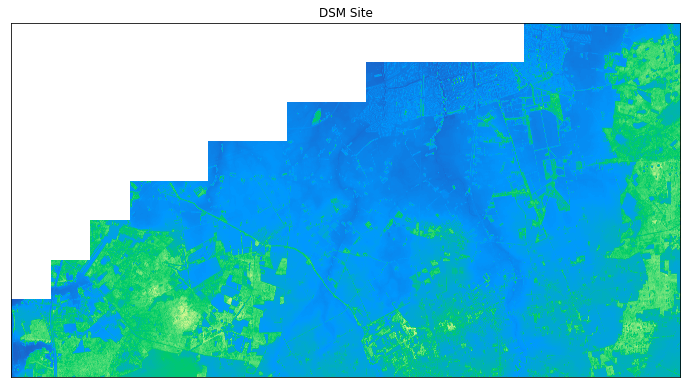

In [83]:
# DSM file in map
import rasterio  as rio
with rio.open(dsm_path) as src:
    lidar_chm_im = src.read(masked=True)[0]
    extent = rio.plot.plotting_extent(src)
    soap_profile = src.profile

# plotting map of dsm    
ep.plot_bands(lidar_chm_im,
               cmap='terrain',
               extent=extent,
               title="DSM Site",
               cbar=False);


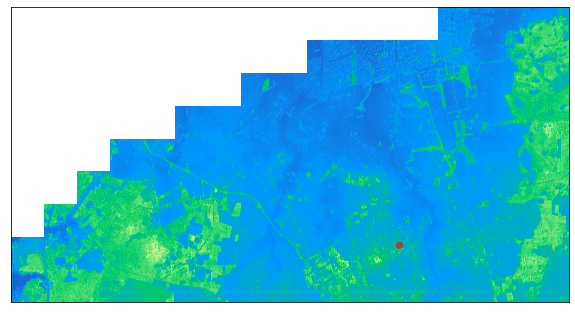

In [24]:
#plotting location in the dsm map

fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(lidar_chm_im,
              cmap='terrain',
              extent=extent,
              ax=ax,
              cbar=False)
location.plot(ax=ax, alpha=.6, color='r');

### Cropping Location

In [67]:
# finding the coordinates of location
location.geometry

0    POINT (155735.738 239317.845)
Name: geometry, dtype: geometry

In [68]:
# latitude and longitude variables
lon = int(155735.737963)
lat = int(239317.844992)

In [69]:
dsm_file.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [75]:
# cropping house using coordinates by making a window  
left = lon - 50
right = lon + 50
bottom = lat - 50
top = lat + 50
window_dsm = dsm_file.read(1,window=from_bounds(left,bottom,right,top,transform=dsm_file.transform ))

In [76]:
# shape of window 
window_dsm.shape

(100, 100)

In [77]:
# plotting 3d plot of dsm file
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=window_dsm)]) 
fig.show()

In [79]:
# dtm cropped window 
window_dtm= dtm_file.read(1,window=from_bounds(left,bottom,right,top,transform=dtm_file.transform ))

In [84]:
# plotting 3d plot of dtm file
import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(z=window_dtm)]) 
fig.show()

In [81]:
# Height of building  
z1 = window_dsm
z2 = window_dtm
fig = go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9)
    ])
    
fig.show()

## House plotting using Geopunt API

In [85]:
# requesting address info

import requests
import json

address = "Stationsstraat 22 2910 Essen"
response = requests.get(f"http://loc.geopunt.be/geolocation/location?q={address}&xy&c=1")
 
# print json content
x = response.json()
print(response.json())


{'LocationResult': [{'Municipality': 'Essen', 'Zipcode': '2910', 'Thoroughfarename': 'Stationsstraat', 'Housenumber': '22', 'ID': 855737, 'FormattedAddress': 'Stationsstraat 22, 2910 Essen', 'Location': {'Lat_WGS84': 51.46729206195446, 'Lon_WGS84': 4.466835098320379, 'X_Lambert72': 156815.72, 'Y_Lambert72': 239746.55}, 'LocationType': 'crab_huisnummer_afgeleidVanGebouw', 'BoundingBox': {'LowerLeft': {'Lat_WGS84': 51.46729206195446, 'Lon_WGS84': 4.466835098320379, 'X_Lambert72': 156815.72, 'Y_Lambert72': 239746.55}, 'UpperRight': {'Lat_WGS84': 51.46729206195446, 'Lon_WGS84': 4.466835098320379, 'X_Lambert72': 156815.72, 'Y_Lambert72': 239746.55}}}]}


In [86]:
# Lambert coordinates for location
loc_x_lambert = x["LocationResult"][0]["Location"]["X_Lambert72"]
loc_y_lambert = x["LocationResult"][0]["Location"]["Y_Lambert72"]

print("Location: X_Lambert72 :",loc_x_lambert, "Y_Lambert72 :",loc_y_lambert)

Location: X_Lambert72 : 156815.72 Y_Lambert72 : 239746.55


In [87]:
# Lambert coordinates for BoundingBox(Lowerleft)

left_x_lambert = x["LocationResult"][0]["BoundingBox"]["LowerLeft"]["X_Lambert72"]
lower_y_lambert = x["LocationResult"][0]["BoundingBox"]["LowerLeft"]["Y_Lambert72"]
print("BoundingBox(Lowerleft): X_Lambert72 : ",left_x_lambert, "Y_Lambert72 : ",lower_y_lambert)

BoundingBox(Lowerleft): X_Lambert72 :  156815.72 Y_Lambert72 :  239746.55


In [88]:
# Lambert coordinates for BoundingBox(UpperRight)
right_x_lambert = x["LocationResult"][0]["BoundingBox"]["UpperRight"]["X_Lambert72"]
upper_y_lambert = x["LocationResult"][0]["BoundingBox"]["UpperRight"]["Y_Lambert72"]
print("BoundingBox(UpperRight): X_Lambert72 : ",right_x_lambert, "Y_Lambert72 : ",upper_y_lambert)

BoundingBox(UpperRight): X_Lambert72 :  156815.72 Y_Lambert72 :  239746.55


In [90]:
# creating window to crop property from dsm
left = left_x_lambert -12
lower = lower_y_lambert -12
right = right_x_lambert +12
upper = upper_y_lambert +12
window_1 = dsm_file.read(1,window=from_bounds(left,lower,right,upper,transform=dsm_file.transform ))

In [91]:
# creating window to crop property from dtm
window_2 = dtm_file.read(1,window=from_bounds(left,lower,right,upper,transform=dtm_file.transform ))

In [92]:
# creating window to crop canopy height 
window_3 = window_1 - window_2

In [93]:
# plotting property in 3d
import plotly.graph_objects as go
X = np.arange(0, window_3.shape[0]*1, 1)
Y = np.arange(0, window_3.shape[1]*-1, -1)
X, Y = np.meshgrid(X,Y)
fig = go.Figure(data=go.Surface(x=X, y=Y, z=window_3))
fig.show()

In [94]:
# plotting house on dsm and dtm both simantaneously
z1 = window_1
z2 = window_2
fig = go.Figure(data=[
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9)
    ])
    
fig.show()